In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from numpy.random import randn
import numpy as np
np.random.seed(12345)


In [2]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
for i in names1880.groupby("sex"):
    print(i)

('F',           name sex  births
0         Mary   F    7065
1         Anna   F    2604
2         Emma   F    2003
3    Elizabeth   F    1939
4       Minnie   F    1746
..         ...  ..     ...
937        Ula   F       5
938     Vannie   F       5
939     Verona   F       5
940     Vertie   F       5
941      Wilma   F       5

[942 rows x 3 columns])
('M',            name sex  births
942        John   M    9655
943     William   M    9533
944       James   M    5927
945     Charles   M    5348
946      George   M    5126
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[1058 rows x 3 columns])


In [5]:
for i in names1880.groupby("sex").size():
    print(i)

942
1058


In [6]:
names1880.groupby("sex")['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [7]:
pieces = []

for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name","sex", "births"])
    frame["year"] = year
    pieces.append(frame)

print(len(pieces))
pieces[0]

131


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [8]:
names = pd.concat(pieces, ignore_index=True)  # 여러 pandas 객체(예: DataFrame 또는 Series)를 축에 따라 연결할 때 사용

In [9]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [10]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc="sum")  # 다양한 요약 통계를 제공
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<Axes: title={'center': 'total birthds by sex and year'}, xlabel='year'>

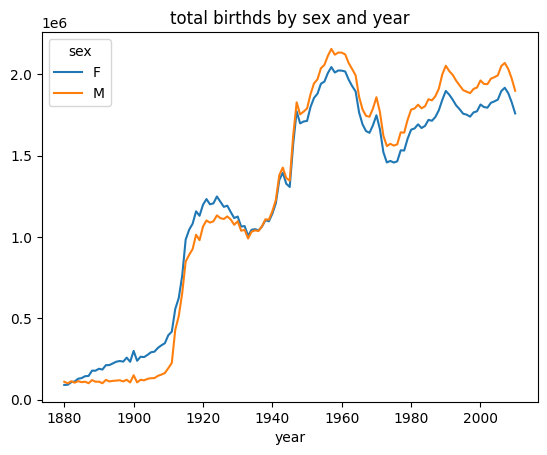

In [11]:
total_births.plot(title="total birthds by sex and year")

In [12]:
names.groupby(['year','sex'])

In [13]:
names.groupby(['year','sex']).size()

year  sex
1880  F        942
      M       1058
1881  F        938
      M        997
1882  F       1028
             ...  
2008  M      14590
2009  F      20123
      M      14479
2010  F      19698
      M      14140
Length: 262, dtype: int64

In [14]:
for i, j in names.groupby(['year','sex']):
    print(i)
    print(j)
    break

(1880, 'F')
          name sex  births  year
0         Mary   F    7065  1880
1         Anna   F    2604  1880
2         Emma   F    2003  1880
3    Elizabeth   F    1939  1880
4       Minnie   F    1746  1880
..         ...  ..     ...   ...
937        Ula   F       5  1880
938     Vannie   F       5  1880
939     Verona   F       5  1880
940     Vertie   F       5  1880
941      Wilma   F       5  1880

[942 rows x 4 columns]


In [15]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year","sex"]).apply(add_prop)
names

/tmp/ipykernel_1456694/552859026.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year","sex"]).apply(add_prop)


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1690779    Zymaire   M       5  2010  0.000003
         1690780     Zyonne   M       5  2010  0.000003
         1690781  Zyquarius   M       5  2010  0.000003
         1690782      Zyran   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [16]:
names = pd.concat(pieces, ignore_index=True)

In [17]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year","sex"], group_keys=False).apply(add_prop)
names

/tmp/ipykernel_1456694/2381030339.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year","sex"], group_keys=False).apply(add_prop)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [18]:
def get_top1000(group):
    result = group.sort_values("births", ascending = False)[:1000]
    return result

grouped = names.groupby(["year","sex"])
top1000 = grouped.apply(get_top1000)
top1000

/tmp/ipykernel_1456694/607112600.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677642     Jaydan   M     194  2010  0.000102
         1677638     Bailey   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677643       Crew   M     193  2010  0.000102

[261877 rows x 5 columns]

In [19]:
top1000 = top1000.reset_index(drop=True)  # 객체의 인덱스를 기본 정수 인덱스로 재설정하는 기능
top1000


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Jaydan,M,194,2010,0.000102
261873,Bailey,M,194,2010,0.000102
261874,Destin,M,194,2010,0.000102
261875,Camilo,M,194,2010,0.000102


In [20]:
boys = top1000[top1000["sex"]=="M"]
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Jaydan,M,194,2010,0.000102
261873,Bailey,M,194,2010,0.000102
261874,Destin,M,194,2010,0.000102
261875,Camilo,M,194,2010,0.000102


In [21]:
girs = top1000[top1000["sex"]=="F"]
girs

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Leilah,F,250,2010,0.000142
260873,Alaysia,F,250,2010,0.000142
260874,Violeta,F,250,2010,0.000142
260875,Yadira,F,249,2010,0.000142


In [22]:
total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc= "sum")
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6863 entries, Aaden to Zuri
dtypes: float64(6863)
memory usage: 6.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

/home/jun/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jun/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jun/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jun/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jun/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jun/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: 

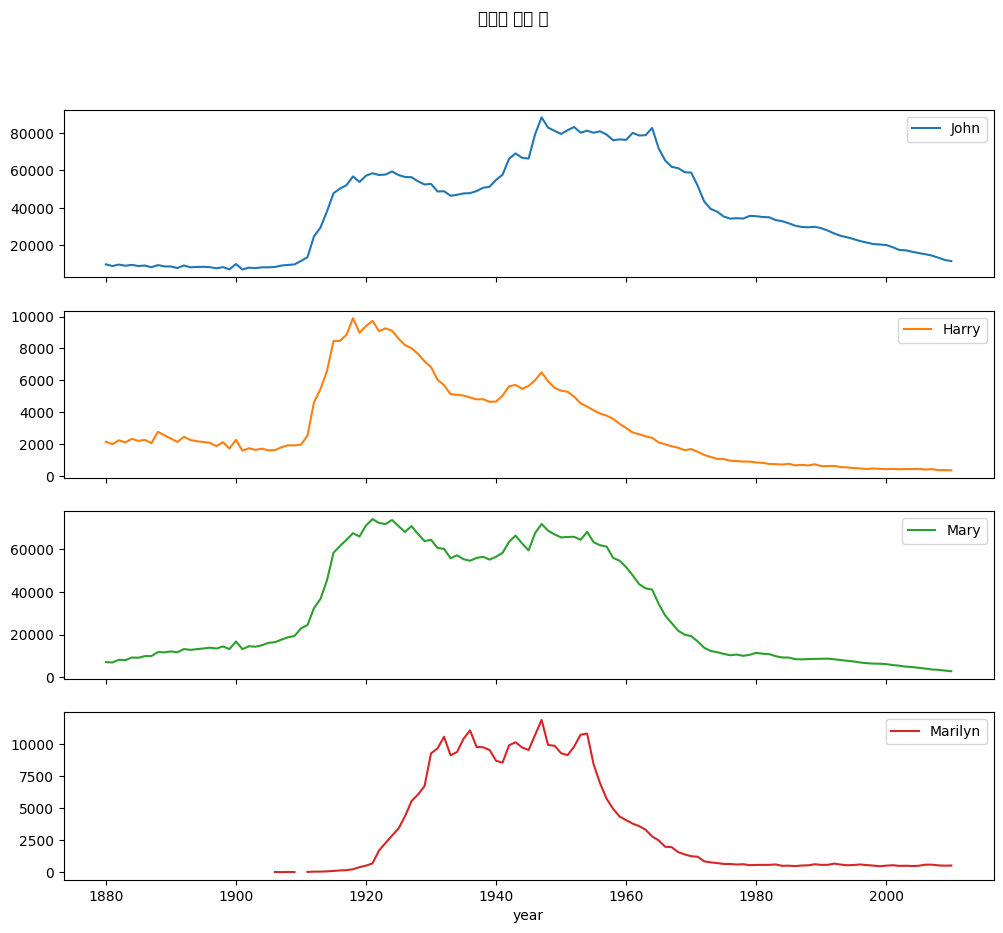

In [23]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

# 변수 이름을 수정하고 figsize 구문을 정정합니다
subset.plot(subplots=True, figsize=(12, 10), title="연도별 출생 수")


In [24]:
table =top1000.pivot_table("prop", index="year", columns="name", aggfunc= "sum")

table.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,0.000923,NaN,NaN,NaN,NaN,NaN,0.000780,...,0.000088,0.000253,NaN,NaN,0.000077,NaN,0.000088,0.000308,0.000297,NaN
1881,NaN,NaN,NaN,0.000933,NaN,NaN,NaN,NaN,NaN,0.000881,...,NaN,0.000239,NaN,NaN,0.000109,NaN,0.000098,0.000228,0.000294,NaN
1882,NaN,NaN,NaN,0.000748,NaN,NaN,NaN,NaN,NaN,0.000742,...,0.000074,0.000232,NaN,NaN,0.000083,NaN,0.000158,0.000297,0.000195,NaN
1883,NaN,NaN,NaN,0.001004,NaN,NaN,NaN,NaN,NaN,0.000703,...,0.000045,0.000205,NaN,NaN,0.000089,NaN,0.000098,0.000312,0.000223,NaN
1884,NaN,NaN,NaN,0.000848,NaN,NaN,NaN,NaN,NaN,0.000760,...,0.000101,0.000240,NaN,NaN,0.000109,0.000052,0.000062,0.000450,0.000209,NaN


In [25]:
df =boys[boys["year"] == 2010]
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
'''
sort_values() 함수는 DataFrame 또는 Series에서 값에 따라 데이터를 정렬합니다. ascending=False 옵션을 사용하면 데이터를 내림차순으로 정렬
cumsum() 함수는 데이터의 누적 합계를 계산합니다. 이 함수는 정렬된 데이터를 순서대로 더하며, 각 단계에서의 중간 합계를 보여주는 새로운 Series 또는 DataFrame 컬럼을 생성
'''

In [26]:
prop_cumsum.searchsorted(0.5)  # 지정된 값을 정렬된 배열에서 삽입할 수 있는 적절한 인덱스를 찾는 데 사용

116

In [27]:
prop_cumsum.iloc[115]

0.4988606086656953

In [28]:
prop_cumsum.iloc[116]

0.5006516075268308

In [29]:
df =boys[boys["year"] == 1900]
prop_cumsum = df['prop'].sort_values(ascending =False).cumsum()
prop_cumsum.searchsorted(0.5) + 1

25

In [30]:
def get_quantile_count(group, q =0.5):
    group = group.sort_values("prop", ascending = False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity

/tmp/ipykernel_1456694/3513432875.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [31]:
diversity = diversity.unstack("sex")  #  DataFrame 또는 Series의 MultiIndex (계층적 인덱스)를 단일 인덱스로 평탄화하는 데 사용

<Axes: xlabel='year'>

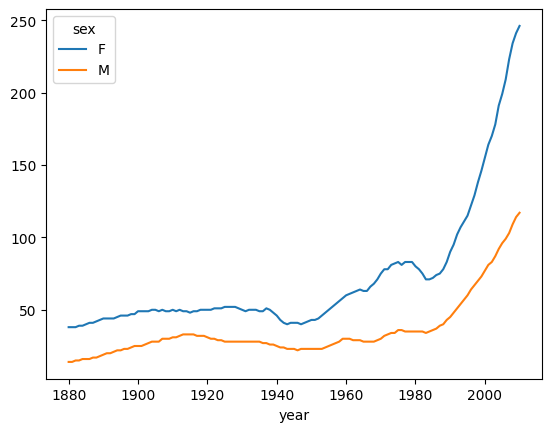

In [32]:
diversity.plot()

In [33]:
def get_last_letter(x):
    return x[-1]

last_letters = names['name'].map(get_last_letter)
last_letters.name = "last_letter"
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [34]:
table = names.pivot_table("births", index = last_letters, columns=["sex", "year"], aggfunc= "sum")

subtable = table.reindex(columns=[1910, 1960, 2010], level= "year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [35]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [36]:
letter_prop = subtable / subtable.sum()


In [37]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

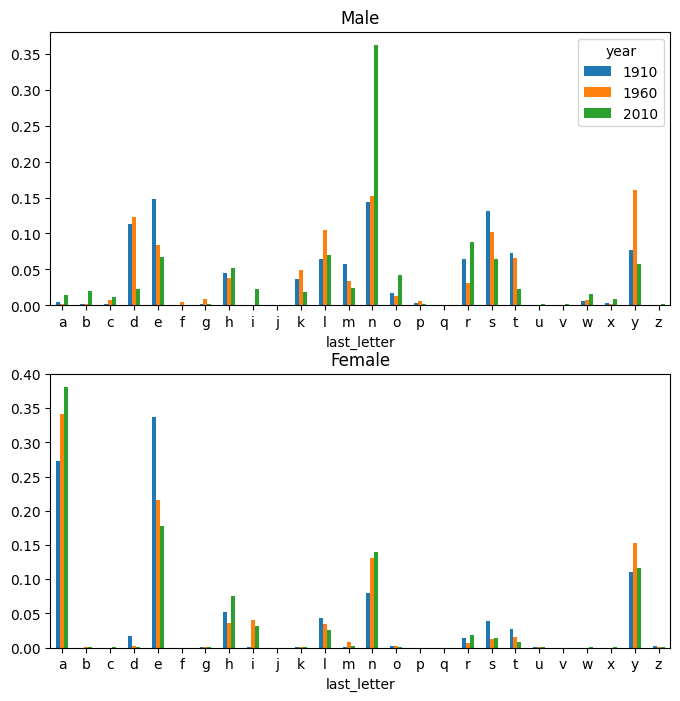

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(8,8))   # 2개의 서브플롯을 세로로 배치하며, 각 서브플롯은 8x8 인치의 피규어 크기를 가집니다.
letter_prop["M"].plot(kind="bar", rot = 0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot = 0, ax=axes[1], title="Female", legend =False) # legend = False로 하면 겹치는건 안나옴
plt.subplots_adjust(hspace = 0.25)
'''
hspace: 서브플롯의 수평 간격을 조정
wspace: 서브플롯의 수직 간격을 조정
'''

In [39]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[["d","n","y"], "M"].T
dny_ts.head()


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Axes: xlabel='year'>

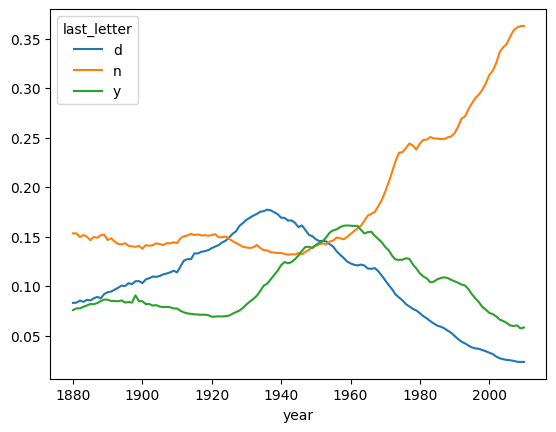

In [40]:
dny_ts.plot()

In [41]:
all_names = pd.Series(top1000["name"].unique())

# 'Lesl'을 포함하는 이름을 필터링
lesley_like = all_names[all_names.str.contains("Lesl")]

# 결과 출력
lesley_like

652     Leslie
2294    Lesley
4258    Leslee
4725     Lesli
6097     Lesly
dtype: object

In [42]:
lesley_like = all_names[all_names.str.contains("Lesl")]
top1000 = top1000[top1000["name"].isin(lesley_like)]

# 이름별로 출생 수 합산
name_births_sum = top1000.groupby("name")["births"].sum()

# 결과 출력
name_births_sum



name
Leslee       993
Lesley     34975
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [43]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee       993
Lesley     34975
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [44]:
table = filtered.pivot_table("births", index="year", columns="sex", aggfunc= "sum")
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,120.0
1884,15.0,125.0


<Axes: xlabel='year'>

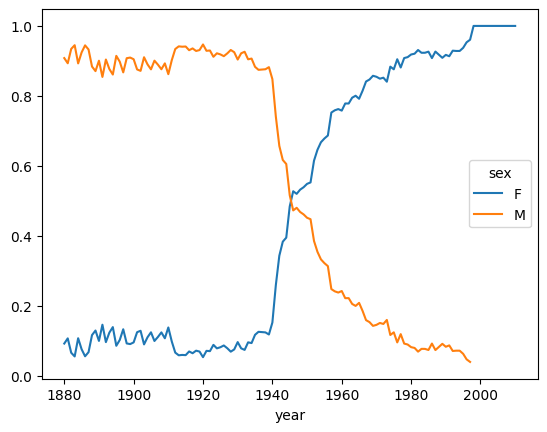

In [45]:
table = filtered.pivot_table("births", index="year", columns= "sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.plot()

In [46]:
import json

In [47]:
db = json.load(open("datasets/usda_food/database.json"))

In [48]:
len(db)

6636

In [49]:
type(db)

list

In [50]:
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [51]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [52]:
db[0]['portions']

[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]

In [53]:
db[0]['nutrients']

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

In [54]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [55]:
db[0]['nutrients'][0].keys()

dict_keys(['value', 'units', 'description', 'group'])

In [77]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head()

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [57]:
info_keys = ['description', 'group', 'id', 'manufacture']
info = pd.DataFrame(db, columns = info_keys)
info

,description,group,id,manufacture
0,"Cheese, caraway",Dairy and Egg Products,1008,NaN
1,"Cheese, cheddar",Dairy and Egg Products,1009,NaN
2,"Cheese, edam",Dairy and Egg Products,1018,NaN
3,"Cheese, feta",Dairy and Egg Products,1019,NaN
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,NaN
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,NaN
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,NaN
6633,"Babyfood, juice, pear",Baby Foods,43408,NaN
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,NaN


In [58]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  6636 non-null   object 
 1   group        6636 non-null   object 
 2   id           6636 non-null   int64  
 3   manufacture  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 207.5+ KB


In [59]:
info["group"].value_counts()[:10]

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64

In [81]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients[0]

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
157,1.472,g,Serine,Amino Acids,1008
158,93.000,mg,Cholesterol,Other,1008
159,18.584,g,"Fatty acids, total saturated",Other,1008
160,8.275,g,"Fatty acids, total monounsaturated",Other,1008


In [82]:
len(nutrients)

6636

In [83]:
total_size = 0

for i in nutrients:
    total_size += len(i)

print(total_size / len(nutrients))

58.67314647377938


In [84]:
nutrients = pd.concat(nutrients, ignore_index = True)
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [64]:
nutrients.duplicated().sum()

14179

In [65]:
nutrients = nutrients.drop_duplicates()
len(nutrients)

375176

In [66]:
info

,description,group,id,manufacture
0,"Cheese, caraway",Dairy and Egg Products,1008,NaN
1,"Cheese, cheddar",Dairy and Egg Products,1009,NaN
2,"Cheese, edam",Dairy and Egg Products,1018,NaN
3,"Cheese, feta",Dairy and Egg Products,1019,NaN
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,NaN
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,NaN
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,NaN
6633,"Babyfood, juice, pear",Baby Foods,43408,NaN
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,NaN


In [67]:
col_mapping = {'description': 'food',
                'group'     : "fgroup"}
info = info.rename(columns= col_mapping, copy=False)

In [68]:
info

,food,fgroup,id,manufacture
0,"Cheese, caraway",Dairy and Egg Products,1008,NaN
1,"Cheese, cheddar",Dairy and Egg Products,1009,NaN
2,"Cheese, edam",Dairy and Egg Products,1018,NaN
3,"Cheese, feta",Dairy and Egg Products,1019,NaN
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,NaN
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,NaN
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,NaN
6633,"Babyfood, juice, pear",Baby Foods,43408,NaN
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,NaN


In [85]:
col_mapping = {'description': 'nutrient',
'group': "nutgroup"}
nutrients = nutrients.rename(columns= col_mapping, copy=False)

In [86]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [87]:
info.keys()

Index(['food', 'fgroup', 'id', 'manufacture'], dtype='object')

In [88]:
nutrients.keys()

Index(['value', 'units', 'nutrient', 'nutgroup', 'id'], dtype='object')

In [89]:
ndata = pd.merge(nutrients, info, on= "id" )

In [90]:
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup,manufacture
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,NaN
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,NaN
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,NaN
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,NaN
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,NaN


In [91]:

for i,j in ndata.groupby(["nutrient", "fgroup"])["value"]:
    print(i)
    print(j)
    break

('Adjusted Protein', 'Sweets')
211922    12.9
Name: value, dtype: float64


<Axes: ylabel='fgroup'>

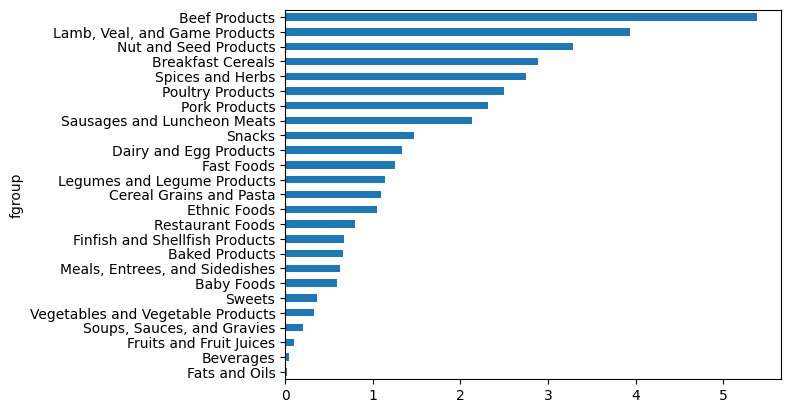

In [97]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)  # quantile(0.5): 각 그룹의 'value' 데이터에 대해 중앙값 (50% 분위수)를 계산
result["Zinc, Zn"].sort_values().plot(kind="barh")  # .plot(kind="barh"): 정렬된 데이터를 수평 막대 그래프로 시각화


In [98]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.107
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

In [99]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])
by_nutrient.size()

nutgroup     nutrient                    
Amino Acids  Alanine                         4259
             Arginine                        4304
             Aspartic acid                   4262
             Cystine                         4261
             Glutamic acid                   4263
                                             ... 
Vitamins     Vitamin D2 (ergocalciferol)       33
             Vitamin D3 (cholecalciferol)    1024
             Vitamin E (alpha-tocopherol)    4272
             Vitamin E, added                3532
             Vitamin K (phylloquinone)       3971
Length: 94, dtype: int64

In [102]:
def get_maximum(x):
    return x.loc[x["value"].idxmax()]
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

/tmp/ipykernel_1456694/4216828024.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


In [103]:
max_foods["food"] = max_foods["food"].str[:50]

In [106]:
max_foods

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [108]:
max_foods.loc["Vitamins"]["food"]

nutrient
Betaine                                                            Quinoa, uncooked
Carotene, alpha                                                  Carrot, dehydrated
Carotene, beta                                    Peppers, sweet, red, freeze-dried
Choline, total                    Beef, variety meats and by-products, kidneys, ...
Cryptoxanthin, beta                                                 Spices, paprika
Dihydrophylloquinone              Margarine, 80% fat, stick, includes regular an...
Folate, DFE                              Cereals ready-to-eat, QUAKER, CAP'N CRUNCH
Folate, food                           Leavening agents, yeast, baker's, active dry
Folate, total                          Leavening agents, yeast, baker's, active dry
Folic acid                               Cereals ready-to-eat, QUAKER, CAP'N CRUNCH
Lutein + zeaxanthin                                                       Kale, raw
Lycopene                                                           

In [109]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory="False")
fec.info()

/tmp/ipykernel_1456694/2356771139.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory="False")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [110]:
fec.iloc[0]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                  366010290.0
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                 250.0
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
Name: 0, dtype: object

In [111]:
unique_cands = fec["cand_nm"].unique()

In [112]:
unique_cands[2]

'Obama, Barack'

In [1]:
import pandas as pd

# 예제 DataFrame 생성
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# 리스트에 DataFrame 추가
pieces = [df1, df2]

# DataFrame 연결
result = pd.concat(pieces, ignore_index=True)
print(result)


   A  B
0  1  3
1  2  4
2  5  7
3  6  8


In [2]:
# 예제 DataFrame 생성
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35]
}, index=["a", "b", "c"])

# 인덱스를 리셋하고 기존 인덱스를 삭제
df_reset = df.reset_index(drop=True)
print(df_reset)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [3]:
import numpy as np

# 예제 NumPy 배열 생성
arr = np.array([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8])

# 값 0.5를 적절한 위치에 삽입하기 위한 인덱스 찾기
index = np.searchsorted(arr, 0.5)
print("Index to insert 0.5:", index)


Index to insert 0.5: 4


In [5]:
import pandas as pd

# 예제 DataFrame 생성
df = pd.DataFrame({
    'A': [10, 20, 30],
    'B': [20, 30, 40]
})

# 스칼라 값으로 나누기
result_scalar = df.div(10)
print(result_scalar)

# 다른 DataFrame으로 나누기
df2 = pd.DataFrame({
    'A': [2, 2, 2],
    'B': [4, 5, 4]
})
result_df = df.div(df2)
print(result_df)


     A    B
0  1.0  2.0
1  2.0  3.0
2  3.0  4.0
      A     B
0   5.0   5.0
1  10.0   6.0
2  15.0  10.0
